In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


Up/Down Sampling

In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('building_117_roof_01_door01_modified.csv').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1) 
#df = pd.read_csv('building_117_roof_01_door01_modified.csv').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1) 
#df1 = df.dropna() 
#df2 = df1.values
df.info()
print(df.shape)
#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 12000, random_state=123)
#df_minority_downsampled = resample(df_minority, replace = False, n_samples = 10000, random_state=123)
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 12000, random_state=123)
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

#display class counts 
df_downsampled.Type.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17877 entries, 0 to 17876
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17877 non-null  float64
 1   Y                  17877 non-null  float64
 2   Z                  17877 non-null  float64
 3   Scan_Angle_Rank    17877 non-null  int64  
 4   Flightline_Edge    17877 non-null  int64  
 5   Scan_Direction     17877 non-null  int64  
 6   Number_of_Returns  17877 non-null  int64  
 7   Return_Number      17877 non-null  int64  
 8   Time               17877 non-null  float64
 9   Intensity          17877 non-null  int64  
 10  Classification     17877 non-null  int64  
 11  Type               17877 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 1.6+ MB
(17877, 12)


door    12000
roof    12000
Name: Type, dtype: int64

In [ ]:
'''
#Reading CSV File, Building_01, which is actually building_0000 
#df =  pd.read_csv('building_117_roof_01_door01_modified.csv').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#, header=0, names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df = pd.read_csv('117_variedroof_Door.csv', sep = '\t').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#, header=0, names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
#df1 = df.dropna() 
#df2 = df1.values

#print(df2[:, 15])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#upsampling majority class 

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 17800, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#display class counts 
df_upsampled.Type.value_counts()
'''


'\n#Reading CSV File, Building_01, which is actually building_0000 \n#df =  pd.read_csv(\'building_117_roof_01_door01_modified.csv\').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#, header=0, names = [\'X\',\'Y\',\'Z\',\'Point_Source_ID\',\'Scan_Angle_Rank\',\'Flightline_Edge\',\'Scan_Direction\',\'Number_of_Returns\',\'Return_Number\',\'Time\',\'Intensity\',\'Classification\',\'Type\'])\ndf = pd.read_csv(\'117_variedroof_Door.csv\', sep = \'\t\').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#, header=0, names = [\'X\',\'Y\',\'Z\',\'Scan_Angle_Rank\',\'Flightline_Edge\',\'Scan_Direction\',\'Number_of_Returns\',\'Return_Number\',\'Time\',\'Intensity\',\'Classification\',\'Type\'])\n#df1 = df.dropna() \n#df2 = df1.values\n\n#print(df2[:, 15])\nfrom sklearn.utils import resample \ndf_majority = df[df.Type == \'roof\']\ndf_minority = df[df.Type == \'door\'] \n\n#print(df_majority)\n#upsampling majority class \n\ndf_min

In [ ]:
#Reading CSV File #1 
df_a = pd.read_csv('building_117_roof_01_door01_modified.csv',sep = ',').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)
df_a1 = df_a.dropna() 
df_a2 = df_a1.values

Sanity Check

In [ ]:
#Checking to see if everything is working 
#df.info()
#df.head(3)
#classifier_count = df['Classification'].value_counts().to_frame()
#classifier_count.head(2)

df_a.info()
#df_a.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17877 entries, 0 to 17876
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17877 non-null  float64
 1   Y                  17877 non-null  float64
 2   Z                  17877 non-null  float64
 3   Scan_Angle_Rank    17877 non-null  int64  
 4   Flightline_Edge    17877 non-null  int64  
 5   Scan_Direction     17877 non-null  int64  
 6   Number_of_Returns  17877 non-null  int64  
 7   Return_Number      17877 non-null  int64  
 8   Time               17877 non-null  float64
 9   Intensity          17877 non-null  int64  
 10  Classification     17877 non-null  int64  
 11  Type               17877 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 1.6+ MB


In [ ]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with resampling
x = df_downsampled.drop('Type', axis = 1)
#print(x)
y = df_downsampled.Type
#print(y)
print(x.shape,y.shape)

(24000, 11) (24000,)


In [ ]:
#Reading CSV File #2 
df_a = pd.read_csv('building_02_roof_doors.csv',sep = ',').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#,header = 0,names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
print(df_a.info())
#For building 000001
x1Old = df_a2[:, :11] 
y1 = df_a2[:, 11] 

x1 = preprocessing.scale(x1Old)
print(x1.std(axis = 0))
#scaler = preprocessing.StandardScaler().fit(x1Old)
#x1 = scaler.transform(x1Old)
#x1 = x1Old

print(x1.shape)
print(x1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58375 entries, 0 to 58374
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  58375 non-null  float64
 1   Y                  58375 non-null  float64
 2   Z                  58375 non-null  float64
 3   Scan_Angle_Rank    58375 non-null  int64  
 4   Flightline_Edge    58375 non-null  int64  
 5   Scan_Direction     58375 non-null  int64  
 6   Number_of_Returns  58375 non-null  int64  
 7   Return_Number      58375 non-null  int64  
 8   Time               58375 non-null  float64
 9   Intensity          58375 non-null  int64  
 10  Classification     58375 non-null  int64  
 11  Type               58375 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 5.3+ MB
None
[1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
(58375, 11)
[[-2.29988919e+00  2.63257620e-01 -2.03847012e-01 ... -1.07808091e+00
  -8.41637894e-01  3.28163880e+00]


Test Train Split

In [ ]:
#Train/Test Split
#print(x)
x_scaled = preprocessing.scale(x)
#x_scaled=x
#print(x_scaled)
#with scaling 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, train_size = 0.7)
print(x_train)

#without scaling 
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.999, train_size = 0.001)

#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
#print(y_train)
#print(x_train)

[[ 0.25555923 -0.7947138  -1.13605792 ... -0.66332657 -0.45876217
  -0.811968  ]
 [-0.1812518  -1.0707301  -0.85948954 ... -0.66333482 -0.47508414
   1.23157563]
 [ 1.20611598  1.85651409  0.92190287 ... -0.74892056 -0.08879743
  -0.811968  ]
 ...
 [-0.89909699  0.00280484  0.87891727 ... -0.8338843   0.86875835
  -0.811968  ]
 [-0.01091457 -0.87080843 -1.13913993 ... -0.74901423 -0.45876217
  -0.811968  ]
 [-0.28228421 -0.95324724 -0.7707605  ... -0.74901423 -0.50772809
   1.23157563]]
(16800, 11) (7200, 11)


In [ ]:
#Logistic Regression 
logreg = LogisticRegression(C=1).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)

['door' 'roof']
Accuracy for Train Data: 1.0
Accuracy for Test Data: 1.0


In [ ]:
yhat_building02 = logreg.predict(x1)
print(np.unique(yhat_building02))
accuracy_b02 = accuracy_score(y1, yhat_building02)
print("Accuracy for Train Data:",accuracy_b02)

['door' 'roof']
Accuracy for Train Data: 0.6157944325481799


In [ ]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label='roof')
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[ 0.18777993  3.09600901  4.9888423  -0.92903303  0.          0.
  -0.19594394 -0.66622438  0.03568376  0.28024761 -0.77604164]]
Intercept: [0.55705502]
Precision: 1.0
Recall: 1.0
Fscore: 1.0


In [ ]:
#Added regularization
cVals = [0.001, 0.01, 0.1, 1, 10, 100]
acc_train_ridge = []
acc_test_ridge = []
fscore_test_ridge = []
for c in cVals:
    # Creating Logistic Regression model object with 'l2' regularization
    logreg_l2 = linear_model.LogisticRegression(C = c)

    # Fitting model on training set
    logreg_l2.fit(x_train,y_train)

    # Finding prediction on training set
    yhat_train_l2 = logreg_l2.predict(x1)

    # Finding training accuracy
    acc_train_l2 = accuracy_score(y1, yhat_train_l2)
    acc_train_ridge.append(acc_train_l2)
    print("Accuracy on train data with ridge (Other building)= %f" % acc_train_l2)
    
    yhat_test_l2 = logreg_l2.predict(x_test)
    acc_test_l2 = accuracy_score(y_test, yhat_test_l2)
    print("Accuracy on train data with ridge = %f" % acc_test_l2)
    acc_test_ridge.append(acc_test_l2)

Accuracy on train data with ridge (Other building)= 0.574013
Accuracy on train data with ridge = 0.999722
Accuracy on train data with ridge (Other building)= 0.588642
Accuracy on train data with ridge = 1.000000
Accuracy on train data with ridge (Other building)= 0.603974
Accuracy on train data with ridge = 1.000000
Accuracy on train data with ridge (Other building)= 0.615794
Accuracy on train data with ridge = 1.000000
Accuracy on train data with ridge (Other building)= 0.625542
Accuracy on train data with ridge = 1.000000
Accuracy on train data with ridge (Other building)= 0.633165
Accuracy on train data with ridge = 1.000000


Confusion matrix, without normalization
[[  739     0]
 [22428 35208]]
Without Normalization
[[1.   0.  ]
 [0.39 0.61]]


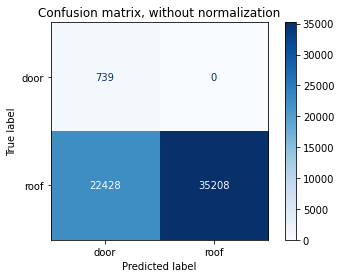

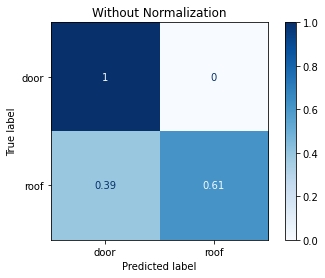

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['door','roof']
classifier = linear_model.LogisticRegression(C=1).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Without Normalization", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>